<a href="https://colab.research.google.com/github/MykhailoFokin/MachineLearning/blob/master/Images_Classification_2020.01.03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import cv2
import fnmatch
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import feature

In [2]:
#Copy images(photos) from repo to colab
!git clone https://github.com/SilvesterHsu/ORLFaceRecognition-PCA.git

Cloning into 'ORLFaceRecognition-PCA'...
remote: Enumerating objects: 604, done.
remote: Total 604 (delta 0), reused 0 (delta 0), pack-reused 604
Receiving objects: 100% (604/604), 3.59 MiB | 5.20 MiB/s, done.
Resolving deltas: 100% (93/93), done.


In [38]:
# Class of model (train and evaluate)
class manyAlgorithmsModel:

  def __init__(self, trainMatrix, testMatrix, trainLabels, testLabels, dataset_shuffled,**kwargs):
    self.estimations_mse = []
    self.estimations_mae = []
    #self.estimations_msle = []
    #self.estimations_std = []

    self.train_images = [] # this data structure is used for print (if required, set print_difference_photos = True)

    self.dataset_shuffle = dataset_shuffled
    #self.print_distribution = print_distribution
    #self.print_unpredicted_data = print_unpredicted_data
    self.print_chiSuared_data = True

    self.testMatrix = testMatrix
    self.trainMatrix = trainMatrix
    self.test_labels = testLabels
    self.train_labels = trainLabels

    self.originalTestMatrix = kwargs["originalTestMatrix"]
    self.originalTrainMatrix = kwargs["originalTrainMatrix"]
    self.numberOfPoints = kwargs["numberOfPoints"]

  def predict(self, print_distribution) :

    self.estimations_mse = []
    self.estimations_mae = []
    #self.estimations_msle = []
    #self.estimations_std = []
    
    self.train_images = []

    for test_image in self.testMatrix:

      matrix_mse = []
      matrix_mae = []
      #matrix_msle = []
      #matrix_std = []
      matrix_chiSquared = []

      for train_image in self.trainMatrix:

        matrix_mse.append(mean_squared_error(test_image, train_image))
        matrix_mae.append(mean_absolute_error(test_image, train_image))
        #matrix_msle.append(mean_squared_log_error(test_image, train_image))
        #matrix_std.append(np.sqrt(mean_squared_error(test_image, train_image)))
        matrix_chiSquared.append(chiSquared(test_image, train_image))

      self.estimations_mse.append(self.train_labels[np.argmin(matrix_mse)])
      self.estimations_mae.append(self.train_labels[np.argmin(matrix_mae)])
      #self.estimations_msle.append(self.train_labels[np.argmin(matrix_msle)])
      #self.estimations_std.append(self.train_labels[np.argmin(matrix_std)])

      self.train_images.append(self.trainMatrix[np.argmin(matrix_mse)]) # for print

    # print dataset distribution
    if print_distribution:
      plt.hist(self.test_labels, bins=range(1, len(list(set(self.test_labels))) + 2))
      plt.yticks(np.arange(0, len(list(set(img_list))) + 1, 1))
      plt.show()

  def predict_chiSquared(self, print_distribution) :
    
    self.estimations_chiSquared = []
    self.train_images_chiSquared = []

    for test_image in self.testMatrix:
      matrix_chiSquared = []

      for train_image in self.trainMatrix:
        matrix_chiSquared.append(chiSquared(test_image, train_image))

      #print(matrix_chiSquared)
      self.estimations_chiSquared.append(self.train_labels[np.argmin(matrix_chiSquared)])
      self.train_images_chiSquared.append(self.originalTrainMatrix[np.argmin(matrix_chiSquared)]) # for print

    # print dataset distribution
    if print_distribution:
      plt.hist(self.test_labels, bins=range(1, len(list(set(self.test_labels))) + 2))
      plt.yticks(np.arange(0, len(list(set(img_list))) + 1, 1))
      plt.show()



  def evaluate(self) :

    self.evaluation_mse = 0
    self.evaluation_mae = 0
    #self.evaluation_msle = 0
    #self.evaluation_std = 0

    if self.estimations_mse :

      self.result_mse = np.equal(self.test_labels, self.estimations_mse)
      self.result_mae = np.equal(self.test_labels, self.estimations_mae)
      #self.result_msle = np.equal(self.test_labels, self.estimations_msle)
      #self.result_std = np.equal(self.test_labels, self.estimations_std)

      matrix_length = len(self.result_mse)

      self.evaluation_mse = np.sum(self.result_mse)/matrix_length
      self.evaluation_mae = np.sum(self.result_mae)/matrix_length
      #self.evaluation_msle = np.sum(self.result_msle)/matrix_length
      #self.evaluation_std = np.sum(self.result_std)/matrix_length

      print('MSE{:s}.  Train/Test : {:d} / {:d} - {:.3f}'.format(' with Shuffle' if self.dataset_shuffle else '',100-split_k*10, split_k*10, self.evaluation_mse))
      print('MAE{:s}.  Train/Test : {:d} / {:d} - {:.3f}'.format(' with Shuffle' if self.dataset_shuffle else '',100-split_k*10, split_k*10, self.evaluation_mae))
      #print('MSLE{:s}.  Train/Test : {:d} / {:d} - {:.3f}'.format(' with Shuffle' if self.dataset_shuffle else '',100-split_k*10, split_k*10, self.evaluation_msle))
      #print('STD{:s}.  Train/Test : {:d} / {:d} - {:.3f}'.format(' with Shuffle' if self.dataset_shuffle else '',100-split_k*10, split_k*10, self.evaluation_std))

    return self.evaluation_mse, self.evaluation_mae

  def evaluate_chiSquared(self) :
    self.evaluation_chiSquared = 0

    if self.estimations_chiSquared :
      self.result_chiSquared = np.equal(self.test_labels, self.estimations_chiSquared)
      matrix_length = len(self.result_chiSquared)
      self.evaluation_chiSquared = np.sum(self.result_chiSquared)/matrix_length

      print('ChiSquared{:s}.  Train/Test : {:d} / {:d} - {:.3f}'.format(' with Shuffle' if self.dataset_shuffle else '',100-split_k*10, split_k*10, self.evaluation_chiSquared))

    return self.evaluation_chiSquared

  def print_data_errors(self) :
    if self.result_mse :
      for img_ind in range(1,len(self.result_mse)):
        if self.result_mse[img_ind]==False:
          img_src = self.testMatrix[img_ind].reshape(112,92)
          print("Index {0}, test:", img_ind)
          print("Index {0}, train:", img_ind)
          img_train = self.train_images[img_ind].reshape(112,92)
          plt.subplot(1,2,1),plt.imshow(img_src)
          plt.title("Test photo")
          plt.subplot(1,2,2),plt.imshow(img_train)
          plt.title("Train photo")
          plt.show()

  def print_LBP_errors(self) :
      if self.print_chiSuared_data :
        for img_ind in range(1,len(self.result_chiSquared)):
          if self.result_chiSquared[img_ind]==False:
            print("Index {0} :".format(img_ind))
            img_src = self.originalTestMatrix[img_ind].reshape(112,92)
            #src_img_train = self.originalTrainMatrix[img_ind].reshape(112,92)
            #src_img_test = self.originalTestMatrix[img_ind].reshape(112,92)
            img_train = self.train_images_chiSquared[img_ind].reshape(112,92)
            src_img_train = getLBPimage(self.train_images_chiSquared[img_ind],self.numberOfPoints)
            src_img_test = getLBPimage(self.originalTestMatrix[img_ind],self.numberOfPoints)

            plt.subplot(1,4,1),plt.imshow(img_src)
            plt.title("Test photo")
            plt.subplot(1,4,2),plt.imshow(img_train)
            plt.title("Train photo")
            plt.subplot(1,4,3),plt.imshow(src_img_test)
            plt.title("Original test")
            plt.subplot(1,4,4),plt.imshow(src_img_train)
            plt.title("Original train")
            plt.show()
      

# Define block of different types of normalization
def f_0_1(a,x_min,x_max):
  return (a-x_min)/(x_max-x_min)

vectorized_f_0_1 = np.vectorize(f_0_1)

def f__1_1(a,x_min,x_max):
  return 2*((a-x_min)/(x_max-x_min))-1

vectorized_f__1_1 = np.vectorize(f__1_1)

def f_std(a,x_mean,x_std):
  return (a-x_mean)/x_std

vectorized_f_std = np.vectorize(f_std)

def f_min_max_0_1(a):
  return vectorized_f_0_1(a,a.min(),a.max())

def f_min_max__1_1(a):
  return vectorized_f__1_1(a,a.min(),a.max())

def f_mean_std(a):
  return vectorized_f__1_1(a,np.mean(a),np.std(a))

# Сlass of LBP realization 
class LocalBinaryPatterns:
  def __init__(self, numPoints, radius):
    # store the number of points and radius
    self.numPoints = numPoints
    self.radius = radius
  
  def describe(self, image, eps=1e-7):
    # compute the Local Binary Pattern representation
    # of the image, and then use the LBP representation
    # to build the histogram of patterns
    lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
    #print(lbp)
    #(hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, self.numPoints + 3), range=(0, self.numPoints + 2))
    #(hist, _) = np.histogram(lbp,bins=np.arange(0, self.numPoints + 3), range=(0, self.numPoints + 2))

    vertical = int(lbp.shape[0] / self.numPoints)
    horizontal = int(lbp.shape[1] / self.numPoints)

    histograms = []
    for r in range(0, lbp.shape[0] - (vertical + 1), vertical):
        for c in range(0, lbp.shape[1] - (horizontal + 1), horizontal):
            #histograms.append(np.histogram(window, bins=np.arange(0, self.numPoints + 3), range=(0, self.numPoints + 2))[0])
            histogram = np.histogram(lbp[r:r+vertical,c:c+horizontal], bins=np.arange(0, self.numPoints + 3))[0]
            histogram = histogram.astype("float")
            histograms.append(histogram.flatten())
    
    # normalize the histogram
    #hist = hist.astype("float")
    #hist /= (hist.sum() + eps)
    
    # return the histogram of Local Binary Patterns
    return np.array(histograms)

def getLBPimage(image,numPoints):
  '''
  == Input ==
  image  : color image of shape (height, width)
  
  == Output ==  
  imgLBP : LBP converted image of the same shape as 
  '''
  
  ### Step 0: Step 0: Convert an image to grayscale
  imgLBP = np.zeros_like(image)
  neighboor = numPoints 
  for ih in range(0,image.shape[0] - neighboor):
      for iw in range(0,image.shape[1] - neighboor):
          ### Step 1: 3 by 3 pixel
          img          = image[ih:ih+neighboor,iw:iw+neighboor]
          center       = img[1,1]
          img01        = (img >= center)*1.0
          img01_vector = img01.T.flatten()
          # it is ok to order counterclock manner
          # img01_vector = img01.flatten()
          ### Step 2: **Binary operation**:
          img01_vector = np.delete(img01_vector,4)
          ### Step 3: Decimal: Convert the binary operated values to a digit.
          where_img01_vector = np.where(img01_vector)[0]
          if len(where_img01_vector) >= 1:
              num = np.sum(2**where_img01_vector)
          else:
              num = 0
          imgLBP[ih+1,iw+1] = num
  return(imgLBP)

# Calculating chi-squared distance
#def chiSquared_src(p,q):
def chiSquared(p,q):
    return 0.5*np.sum((p-q)**2/(p+q+(1e-6)))

#vectorized_chiSquared = np.vectorize(chiSquared_src)

#def chiSquared(p,q):
#  return vectorized_chiSquared(p,q)



print("Objects initialized successfully")

Objects initialized successfully


LBP. N: 4, R: 5
ChiSquared.  Train/Test : 90 / 10 - 0.925
Index 4 :


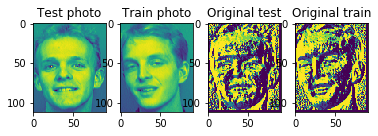

Index 9 :


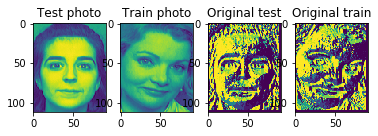

LBP. N: 4, R: 5
ChiSquared.  Train/Test : 80 / 20 - 0.925
Index 27 :


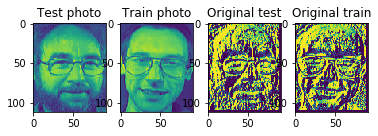

Index 35 :


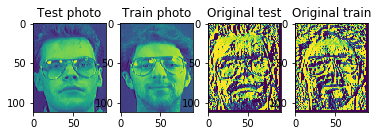

Index 40 :


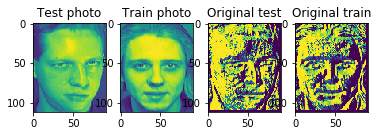

Index 44 :


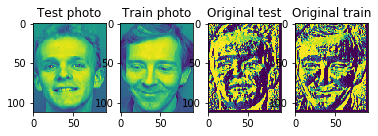

Index 49 :


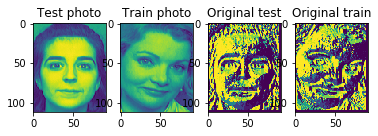

Index 75 :


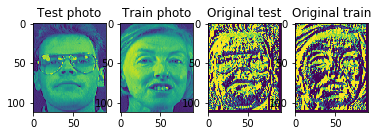

[4, 5, 20, 20, 0.925]


In [45]:
### Main block of initialization ###
dataset = []
#dataset_images = []
indexes = []
test_matrix = []
train_matrix = []
test_labels = []
train_labels = []
path_x=[]
img_list = []
train_images = []
scaler_enum = ['s0_1','s_1_1','s_std']
np_axis = 1; # 0 - vertical, 1 - horizontal
### Different configurable flag for apply or not some preprocessing ###
Basic_use_flag = False           # Basic prediction with MSE
### train_test_split function parameters ###
random_state = 42                # use as default 42
dataset_shuffle = False          # use as default False
stratify = None                  # use as default None
### Normalization parameters ###
PCA_use_flag = False             # do not use PCA if flag is set to False
PCA_n_components = 0.99          # Use as default following values: 0.95, 0.98, 0.99
Normalization_Funtion = False    # False mean do not use standart normalization, else type any of following functions(string): f_min_max_0_1, f_min_max__1_1, f_mean_std)
### model additional parameters ###
print_unpredicted_data = False   # print photos that were recognized incorrectly
print_distribution = False       # print source photo distribution along the test/train matrices (each step)
### LBP parameters ###
LBP_use_flag = True

# read folder structure with files and put it to collection
folder = []
for i in os.walk(os.path.join('ORLFaceRecognition-PCA','att_faces')):
  folder.append(i)

for address, dirs, files in folder:
  for file in fnmatch.filter(files, '*.pgm'):
    path_x.append(os.path.join(address,file))

for file in sorted(path_x, key=lambda x: int(x.split("/",3)[3].rstrip('.pgm')+x.split("/",3)[2].lstrip("s").zfill(2))):

  img = cv2.imread(file)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
  gray = gray.astype(float)
  person = file.split("/",3)[2].lstrip("s")

  #dataset_images.append(img)
  
  #dataset.append(gray.flatten())
  dataset.append(gray)
  indexes.append(int(person))
  img_list.append(file.split("/",3)[3].rstrip('.pgm'))

#dataset = np.array(dataset)
# Normalization block
if Normalization_Funtion :
  dataset = np.array(dataset)
  #dataset=dataset.swapaxes(0,1) # if we want swap axes of input array
  
  if Normalization_Funtion == 'f_min_max_0_1' :
    dataset = np.apply_along_axis(f_min_max_0_1,np_axis,dataset)
  elif Normalization_Funtion == 'f_min_max__1_1' :
    dataset = np.apply_along_axis(f_min_max__1_1,np_axis,dataset)
  elif Normalization_Funtion == 'f_mean_std' :
    dataset = np.apply_along_axis(f_mean_std,np_axis,dataset)
  # do not apply anything else for basic normalization if names above missing. move to another code block

# How to use :
# Without shuffle 1,10 (train*test: 90*10, 80*20, etc)
# With shuffle 10,19
# Both 1,19
#for split_mark in range(1, 19):
#for split_mark in range(1, 10):
for split_mark in range(1, 3): # 90-70% train matrix size, have no sense to check other splits 
                               # (no valuable information for futher implementation, as well as shuffling)

  if split_mark>=10:
    dataset_shuffle = True
    split_k=split_mark-9
  else:
    split_k=split_mark

  train_matrix, test_matrix, train_labels, test_labels = train_test_split(dataset, indexes, test_size=split_k/10, random_state=random_state, shuffle=dataset_shuffle, stratify=stratify)

  # PCA
  if PCA_use_flag :
    pca = PCA(n_components = PCA_n_components).fit(train_matrix)
    train_matrix = pca.transform(train_matrix)
    test_matrix = pca.transform(test_matrix)

  #print(train_matrix.shape)

  #print(train_img)
  #print(test_img)
  if LBP_use_flag :
    LBP_table_result = []
    #for N in range(1,11) :
    for N in range(4,5) :
      #for R in range(1,6) :
      for R in range(5,6) :
        # initialize the local binary patterns descriptor along with
        # the data and label lists
        print("LBP. N: {0}, R: {1}".format( N, R))
        desc = LocalBinaryPatterns(N, R)
        data_train = []
        labels_train = []
        data_test = []
        labels_test = []

        labels_train = train_labels
        labels_test = test_labels

        for img in train_matrix :
          #print(img.shape)
          hist = desc.describe(img)
          #hist = desc.getLBPimage(img)
          data_train.append(hist)
          #print(hist)
          #break

        for img in test_matrix :
          hist = desc.describe(img)
          #hist = desc.getLBPimage(img)
          data_test.append(hist)

        #data_train = data_train.flatten()
        #data_test = data_test.flatten()
        #print(data_test)
        #img_src = data_train[18].reshape(1, -1)
        #img_train = data_test[18].reshape(1, -1)
        #plt.subplot(1,2,1),plt.imshow(img_src)
        #plt.title("Test photo")
        #plt.subplot(1,2,2),plt.imshow(img_train)
        #plt.title("Train photo")
        #plt.show()

        model = manyAlgorithmsModel(data_train, data_test, train_labels, test_labels, dataset_shuffle, **{"originalTrainMatrix":train_matrix,"originalTestMatrix":test_matrix, "numberOfPoints": N})

        model.predict_chiSquared(print_distribution)
        LBP_table_result.append([N,R,split_mark*10,split_k*10,model.evaluate_chiSquared()])
        model.print_LBP_errors()

    if Basic_use_flag :
      model = manyAlgorithmsModel(train_matrix, test_matrix, train_labels, test_labels, dataset_shuffle)

      model.predict(print_distribution)
      model.evaluate()

# Print LBP results in one.
for res in LBP_table_result:
  print(res)